# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [77]:
# Load Dataset
file_path = "clustering_dataset.csv"
df = pd.read_csv(file_path)

print("Jumlah baris dan kolom:", df.shape)

df.head()

Jumlah baris dan kolom: (2282, 20)


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Location,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,CustomerAge_Binned,Cluster,TransactionType,Channel,CustomerOccupation
0,14.09,70.0,81.0,1,5112.21,San Diego,0,1,1,0,0,1,0,0,0,Lansia,1,Debit,ATM,Doctor
1,376.24,68.0,141.0,1,13758.91,Houston,0,1,1,0,0,1,0,0,0,Lansia,1,Debit,ATM,Doctor
2,126.29,19.0,56.0,1,1122.35,Mesa,0,1,0,0,1,0,0,0,1,Remaja,1,Debit,Online,Student
3,184.50,26.0,25.0,1,8569.06,Raleigh,0,1,0,0,1,0,0,0,1,Dewasa Muda,1,Debit,Online,Student
4,13.45,26.0,198.0,1,7429.40,Atlanta,1,0,0,0,1,0,0,0,1,Dewasa Muda,3,Credit,Online,Student


In [78]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TransactionAmount            2282 non-null   float64
 1   CustomerAge                  2282 non-null   float64
 2   TransactionDuration          2282 non-null   float64
 3   LoginAttempts                2282 non-null   int64  
 4   AccountBalance               2282 non-null   float64
 5   Location                     2282 non-null   object 
 6   TransactionType_Credit       2282 non-null   int64  
 7   TransactionType_Debit        2282 non-null   int64  
 8   Channel_ATM                  2282 non-null   int64  
 9   Channel_Branch               2282 non-null   int64  
 10  Channel_Online               2282 non-null   int64  
 11  CustomerOccupation_Doctor    2282 non-null   int64  
 12  CustomerOccupation_Engineer  2282 non-null   int64  
 13

In [79]:
# Cek missing values
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
TransactionAmount               0
CustomerAge                     0
TransactionDuration             0
LoginAttempts                   0
AccountBalance                  0
Location                        0
TransactionType_Credit          0
TransactionType_Debit           0
Channel_ATM                     0
Channel_Branch                  0
Channel_Online                  0
CustomerOccupation_Doctor       0
CustomerOccupation_Engineer     0
CustomerOccupation_Retired      0
CustomerOccupation_Student      0
CustomerAge_Binned             49
Cluster                         0
TransactionType                 0
Channel                         0
CustomerOccupation              0
dtype: int64


In [80]:
df.dropna(subset=['CustomerAge_Binned'], inplace=True)

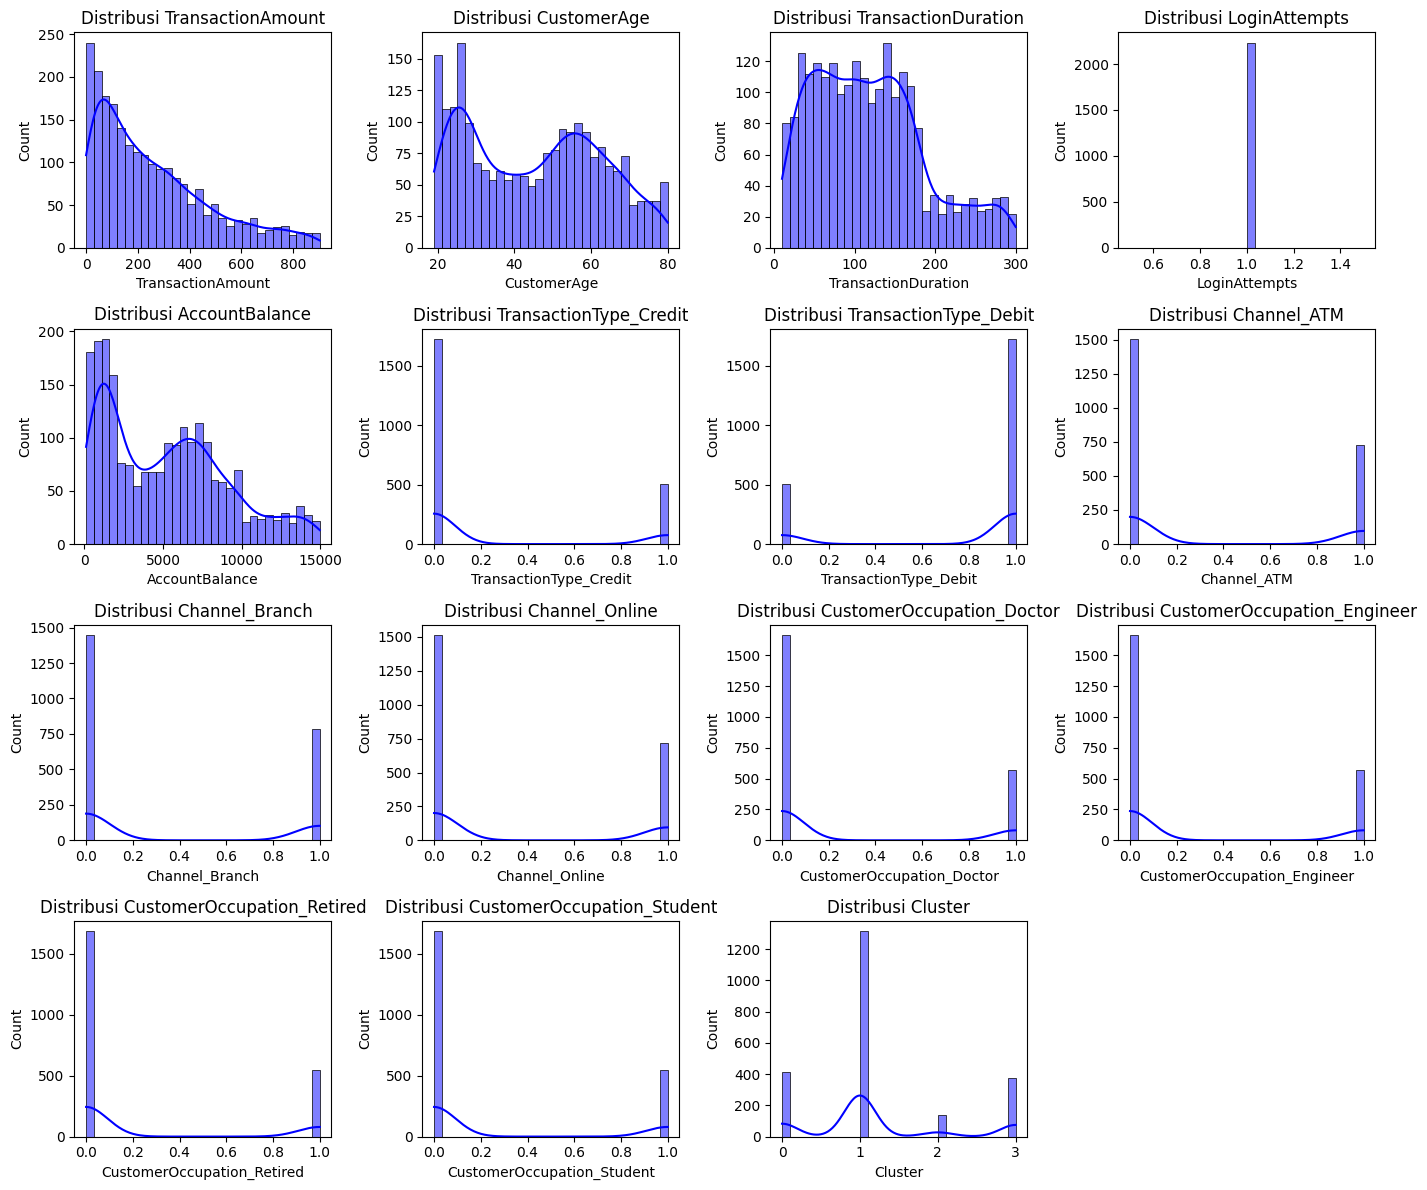

In [81]:
# Pilih fitur numerik
num_features = df.select_dtypes(include=[np.number])

# Tentukan jumlah kolom yang tetap, misal 4
n_cols = 4
n_rows = int(np.ceil(len(num_features.columns) / n_cols))  # Hitung jumlah baris

# Buat figure dan axes dengan ukuran yang sesuai
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 3 * n_rows))
axes = axes.flatten()  # Flatten untuk akses mudah

# Loop untuk plotting setiap fitur
for i, column in enumerate(num_features.columns):
    sns.histplot(df[column], bins=30, kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribusi {column}')

# Matikan subplot kosong jika jumlah fitur tidak kelipatan 4
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<ipython-input-82-a1fe5e2936c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
<ipython-input-82-a1fe5e2936c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
<ipython-input-82-a1fe5e2936c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
<ipython-input-82-a1fe5e2936c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for

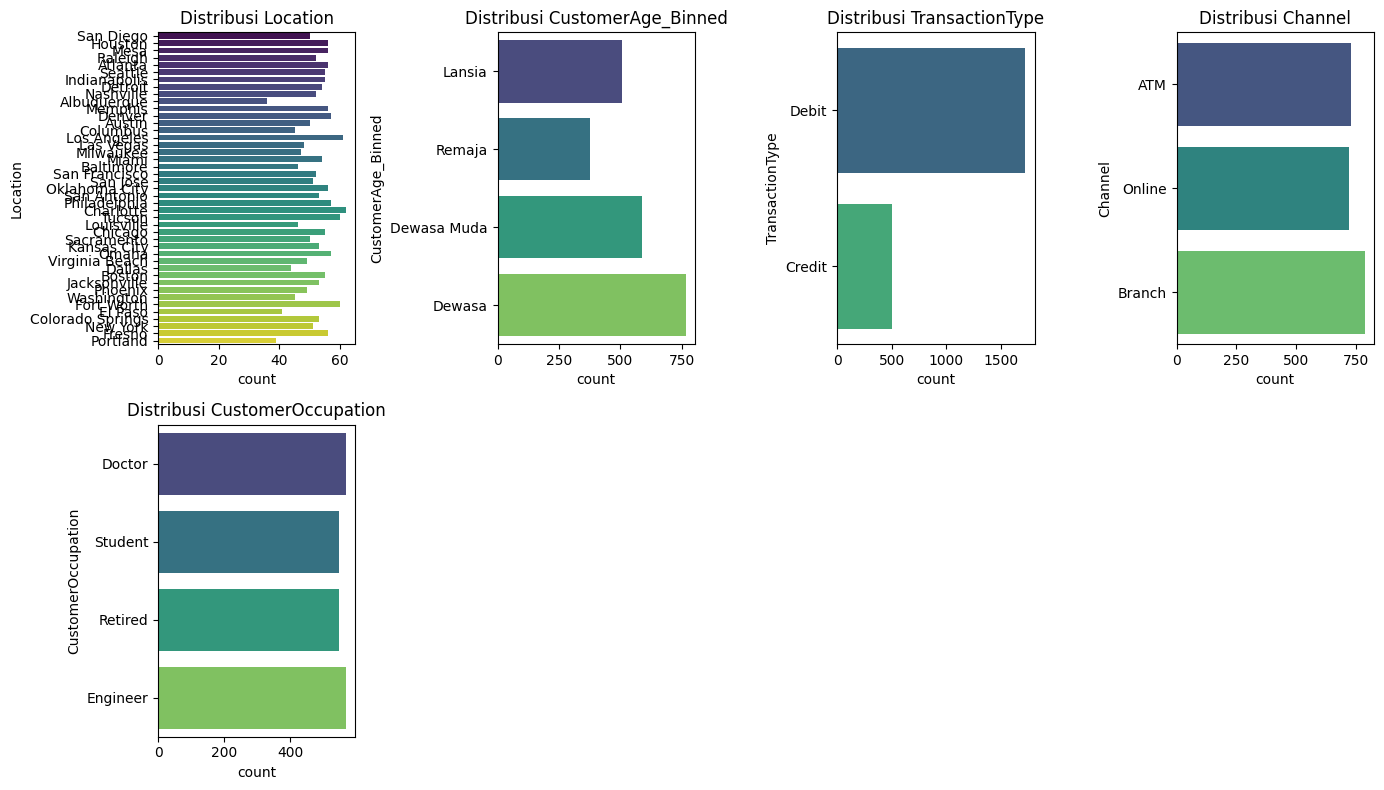

In [82]:
# Distribusi fitur kategorikal
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

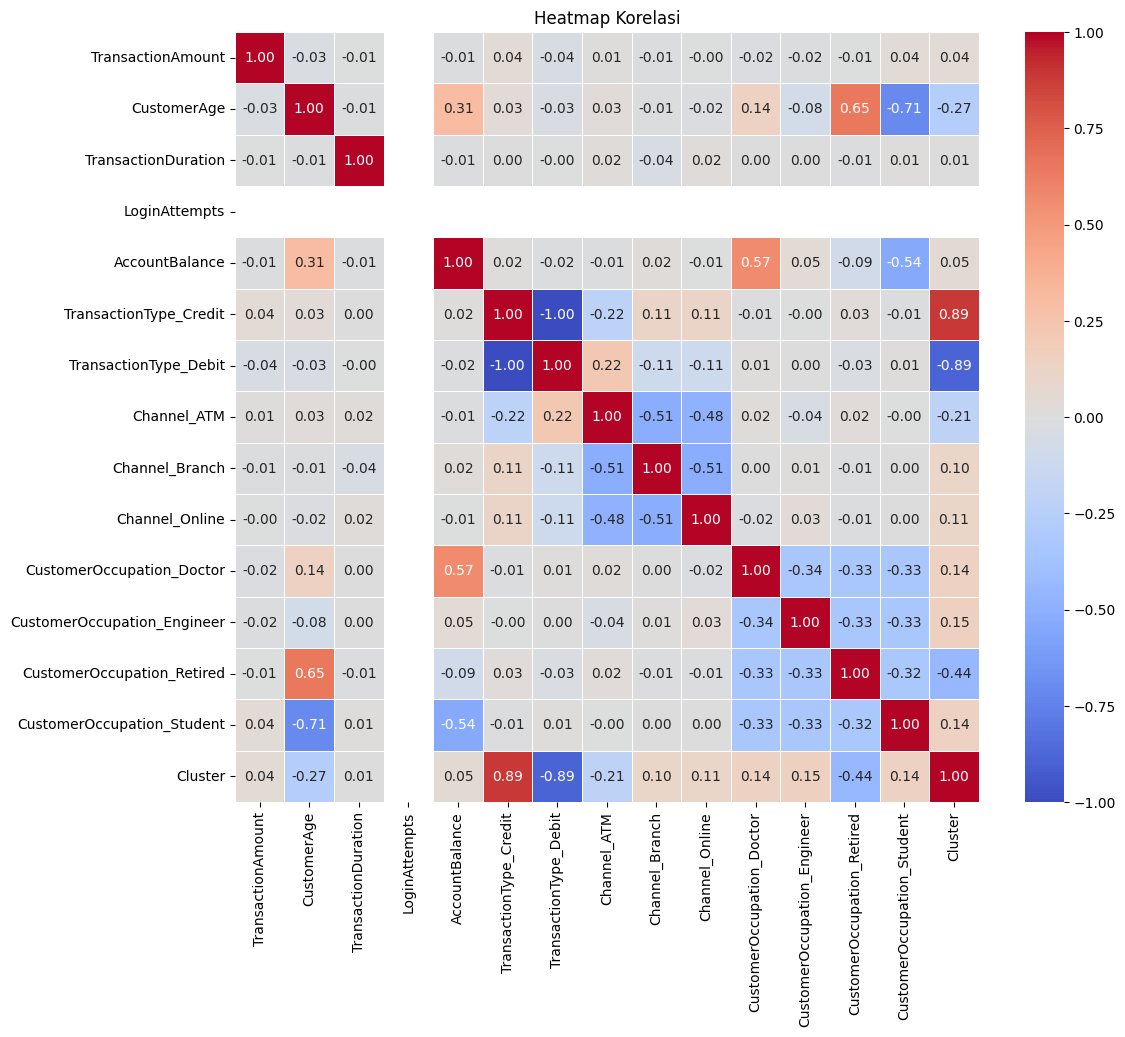

In [83]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

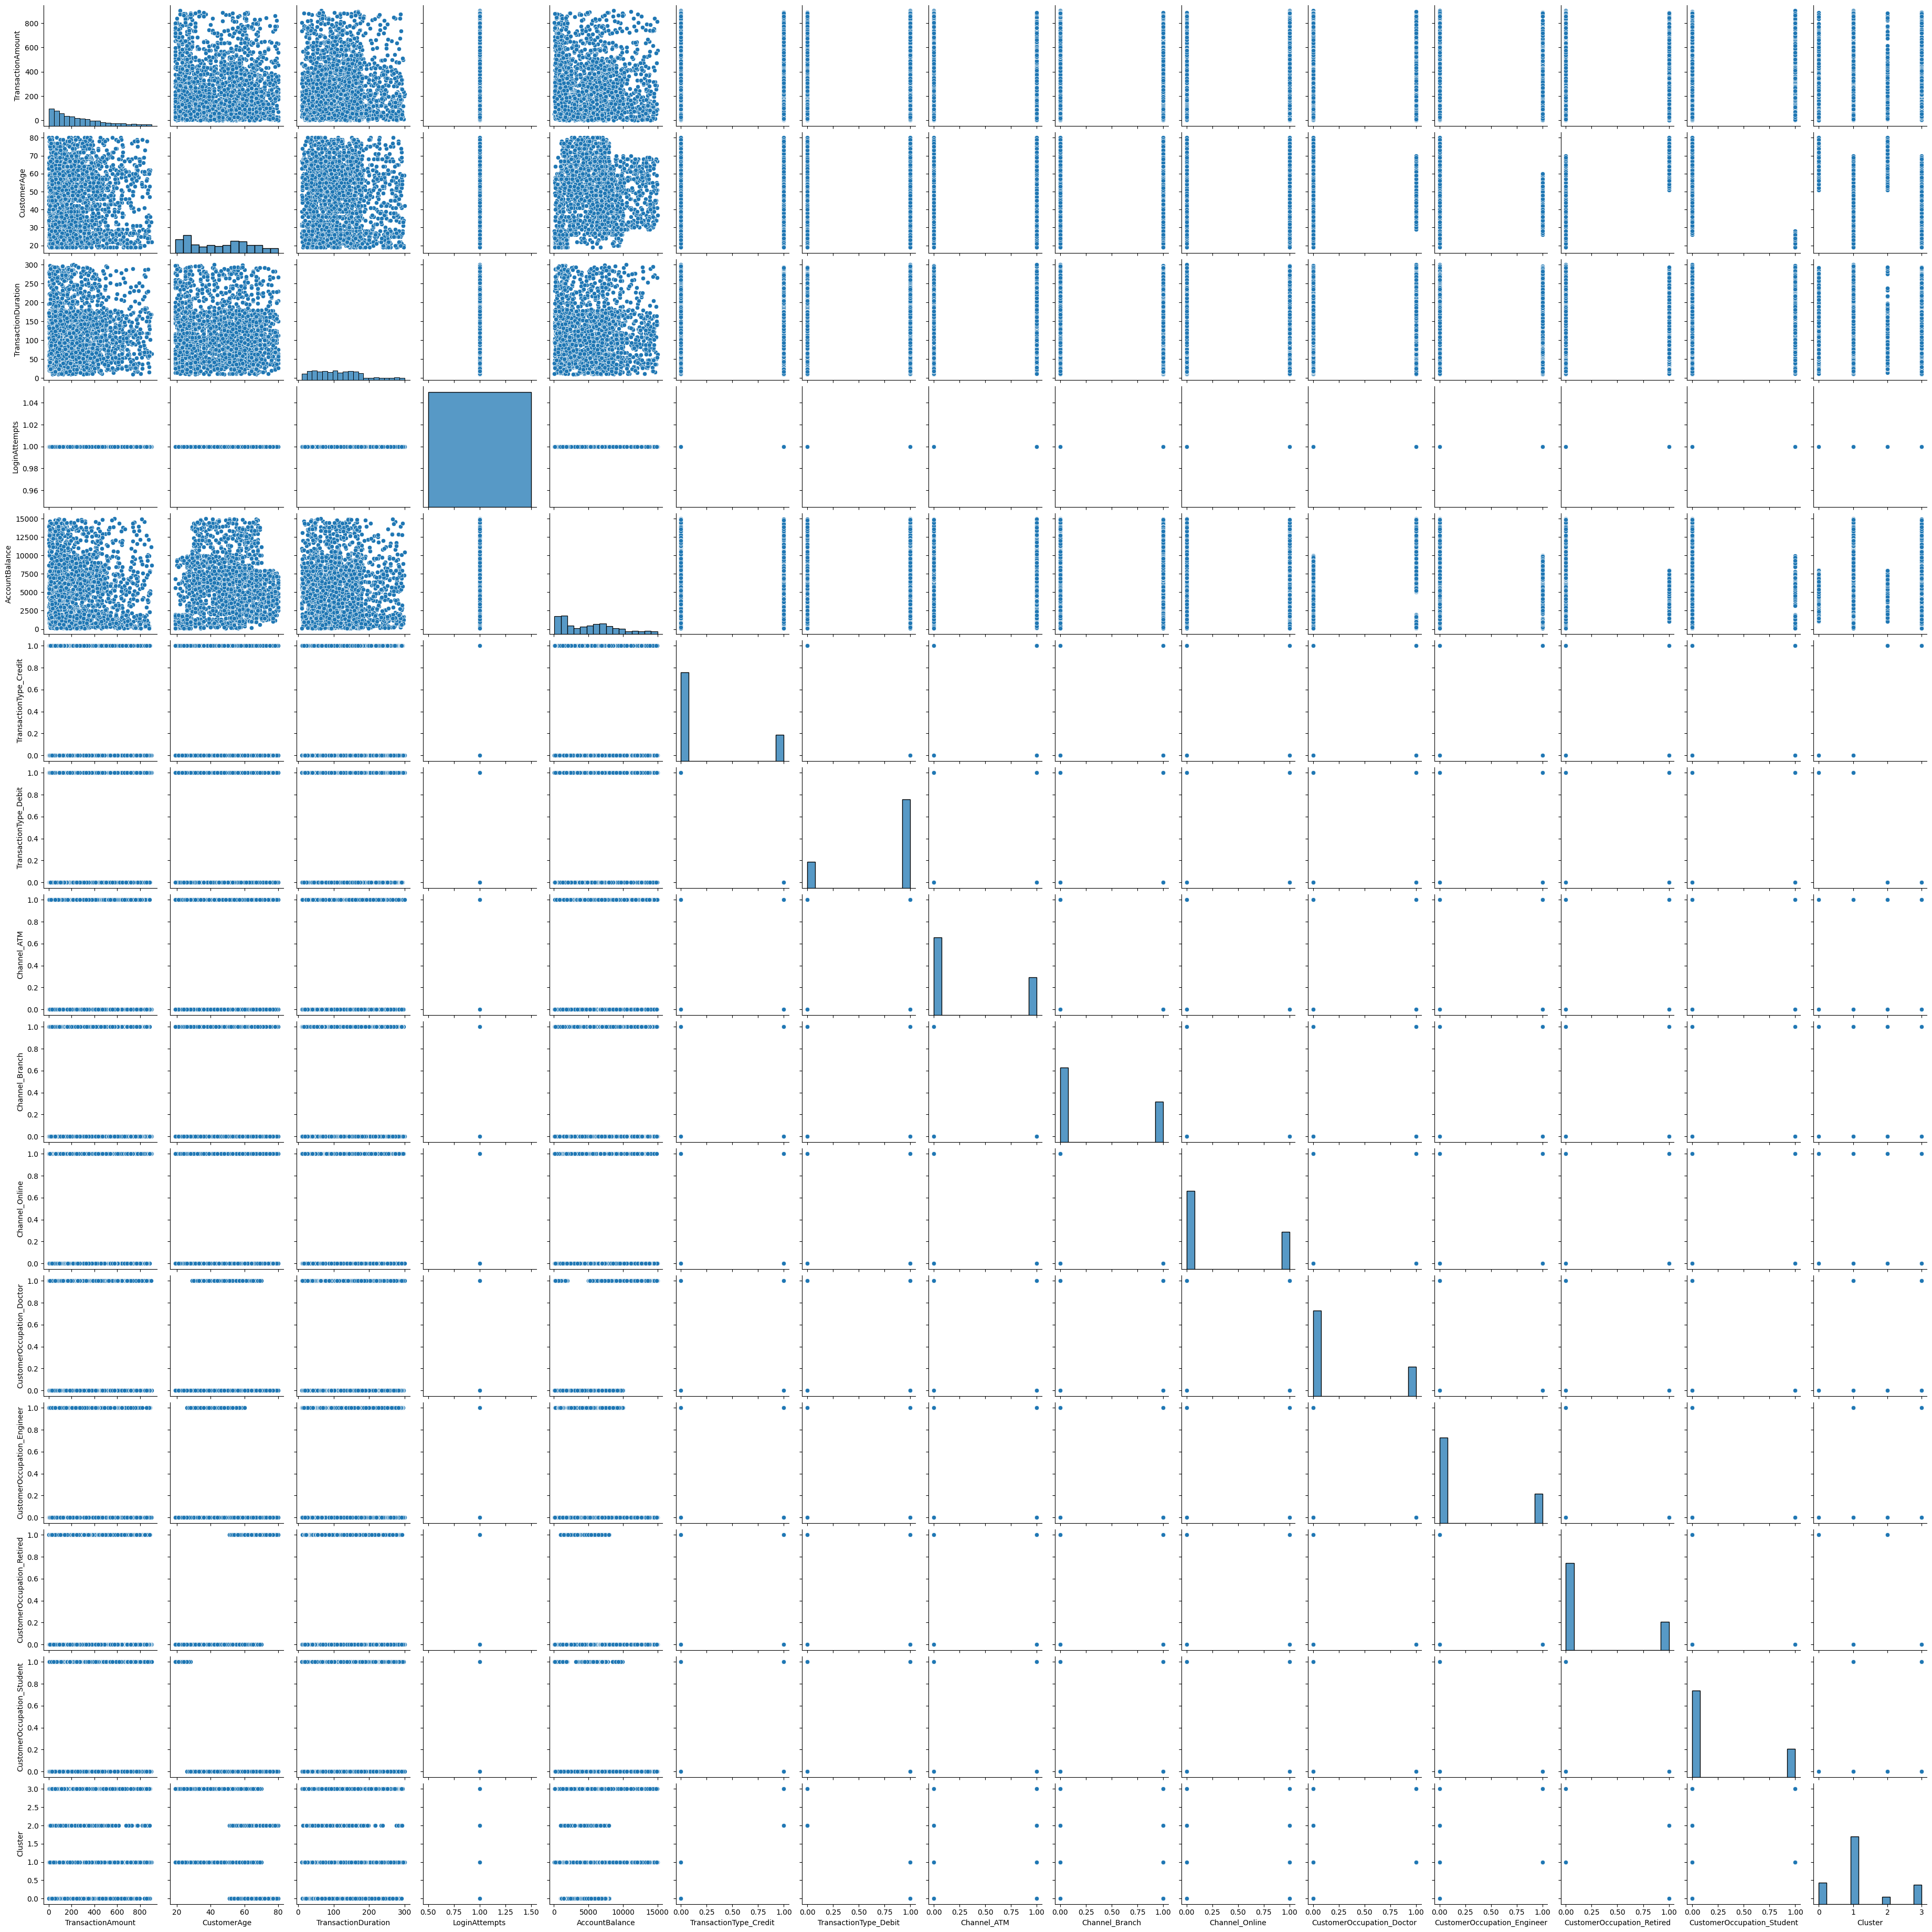

In [84]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

<ipython-input-85-a18010e0ec21>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


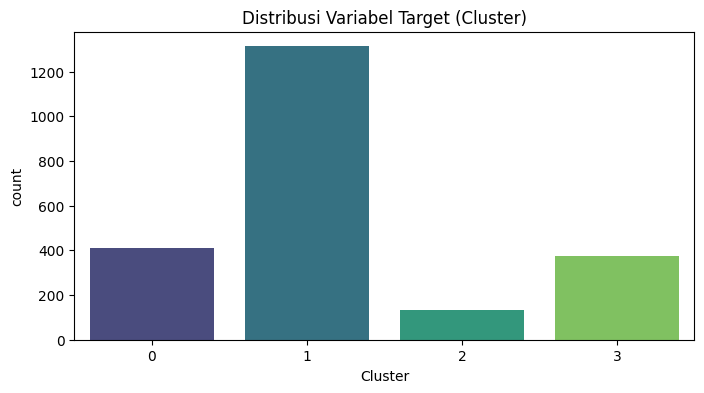

In [85]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (Cluster)')
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [86]:
# Drop label (target)
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# Ubah fitur kategorikal ke numerik
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['Location', 'CustomerAge_Binned', 'TransactionType', 'Channel', 'CustomerOccupation']

# Encode kolom kategorikal
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Tampilkan dfFrame untuk memastikan encoding telah diterapkan
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Location,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,CustomerAge_Binned,Cluster,TransactionType,Channel,CustomerOccupation
0,14.09,70.0,81.0,1,5112.21,36,0,1,1,0,0,1,0,0,0,2,1,1,0,0
1,376.24,68.0,141.0,1,13758.91,15,0,1,1,0,0,1,0,0,0,2,1,1,0,0
2,126.29,19.0,56.0,1,1122.35,23,0,1,0,0,1,0,0,0,1,3,1,1,2,3
3,184.50,26.0,25.0,1,8569.06,33,0,1,0,0,1,0,0,0,1,1,1,1,2,3
4,13.45,26.0,198.0,1,7429.40,1,1,0,0,0,1,0,0,0,1,1,3,0,2,3


In [88]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# Split df menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")


Training set shape: X_train=(1786, 19), y_train=(1786,)
Test set shape: X_test=(447, 19), y_test=(447,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [89]:
y_train = y_train.astype(int).astype(str)  # Konversi ke string agar pasti kategori

In [90]:
print(y_train.unique())  # Mengecek nilai unik dalam variabel target
print(y_train.dtypes)  # Mengecek tipe data setelah konversi

['1' '0']
object


In [91]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Dalam kode di atas, digunakan beberapa algoritma klasifikasi untuk melatih model dengan dataset yang telah disediakan (X_train dan y_train). Berikut adalah penjelasan masing-masing algoritma:

1. K-Nearest Neighbors (KNN)
    
    Algoritma ini bekerja dengan mencari sejumlah k tetangga terdekat dari data baru berdasarkan jarak (misalnya, Euclidean) dan mengklasifikasikannya berdasarkan mayoritas label tetangga tersebut. Cocok untuk dataset dengan pola yang jelas, tetapi bisa lambat pada dataset besar.

2. Decision Tree (DT)

    Algoritma ini membangun pohon keputusan dengan membagi data berdasarkan fitur yang memberikan pemisahan terbaik menggunakan metrik seperti Gini Impurity atau Entropy. Decision Tree mudah dipahami dan dapat menangkap hubungan non-linear dalam data.

3. Random Forest (RF)

    Algoritma ini merupakan ansambel dari banyak pohon keputusan (Decision Trees). Dengan menggabungkan hasil dari beberapa pohon secara voting (majority voting), Random Forest meningkatkan akurasi dan mengurangi risiko overfitting dibandingkan Decision Tree tunggal.

4. Support Vector Machine (SVM)
    
    Algoritma SVM mencari hyperplane terbaik yang memisahkan kelas data dengan margin maksimum. Jika data tidak dapat dipisahkan secara linear, SVM dapat menggunakan kernel trick untuk memetakan data ke dimensi yang lebih tinggi agar lebih mudah dipisahkan.

5. Naïve Bayes (GaussianNB)
    
    Naïve Bayes adalah algoritma berbasis probabilitas yang menggunakan Teorema Bayes dengan asumsi independensi antar fitur. Gaussian Naïve Bayes khususnya mengasumsikan bahwa data memiliki distribusi normal (Gaussian), sehingga cocok untuk data kontinu dan kategori dengan distribusi serupa.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [92]:
# Pastikan y_test adalah integer
y_test = y_test.astype(int)

# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Pastikan hasil prediksi berbentuk integer
    y_pred = y_pred.astype(int)

    # Hitung metrik evaluasi
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Evaluasi setiap model yang sudah dilatih
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk menampilkan hasil evaluasi
summary_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Cetak hasil evaluasi
print(summary_df)

                              Accuracy  Precision  Recall  F1-Score
K-Nearest Neighbors (KNN)          1.0        1.0     1.0       1.0
Decision Tree (DT)                 1.0        1.0     1.0       1.0
Random Forest (RF)                 1.0        1.0     1.0       1.0
Support Vector Machine (SVM)       1.0        1.0     1.0       1.0
Naive Bayes (NB)                   1.0        1.0     1.0       1.0


Berdasarkan hasil evaluasi awal, semua model klasifikasi (KNN, Decision Tree, Random Forest, SVM, dan Naïve Bayes) memiliki akurasi, presisi, recall, dan F1-score sebesar 1.0 (100%). Hal ini menunjukkan bahwa model mampu mengklasifikasikan data tanpa kesalahan.

Namun, skor yang sempurna ini bisa jadi indikasi overfitting, terutama jika dataset yang digunakan terlalu kecil atau tidak memiliki variasi yang cukup. Oleh karena itu, dilakukan tuning hyperparameter untuk meningkatkan generalisasi model.



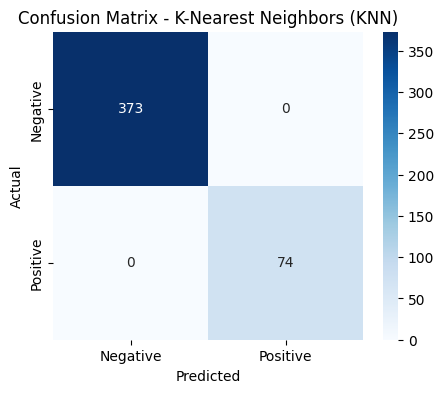

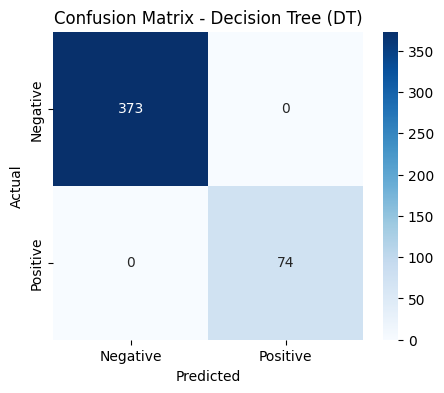

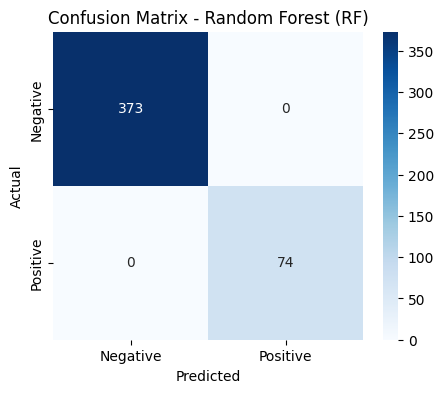

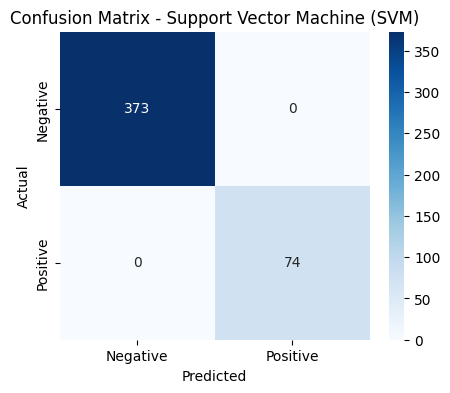

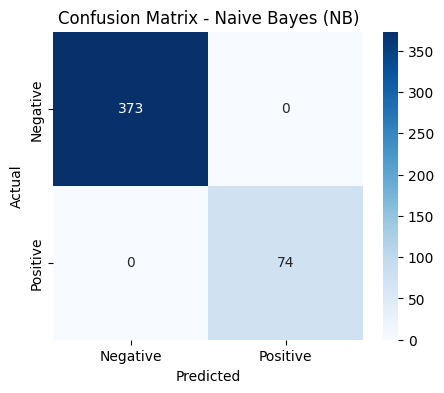

In [94]:
# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred = y_pred.astype(int)  # Ubah prediksi ke integer agar sesuai dengan y_test

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrix untuk setiap model
plot_confusion_matrix(knn, X_test, y_test, "K-Nearest Neighbors (KNN)")
plot_confusion_matrix(dt, X_test, y_test, "Decision Tree (DT)")
plot_confusion_matrix(rf, X_test, y_test, "Random Forest (RF)")
plot_confusion_matrix(svm, X_test, y_test, "Support Vector Machine (SVM)")
plot_confusion_matrix(nb, X_test, y_test, "Naive Bayes (NB)")

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [98]:
# 1. Tuning K-Nearest Neighbors (KNN)
param_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

# 2. Tuning Decision Tree (DT)
param_dt = {'max_depth': [3, 5, 10, None], 'criterion': ['gini', 'entropy']}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

# 3. Tuning Random Forest (RF)
param_rf = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]}
grid_rf = RandomizedSearchCV(RandomForestClassifier(), param_rf, cv=5, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=42)
grid_rf.fit(X_train, y_train)

# 4. Tuning Support Vector Machine (SVM)
param_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid_svm = GridSearchCV(SVC(), param_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

# 5. Naive Bayes tidak memiliki banyak hyperparameter yang bisa dituning
nb = GaussianNB()
nb.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best KNN Params:", grid_knn.best_params_)
print("Best DT Params:", grid_dt.best_params_)
print("Best RF Params:", grid_rf.best_params_)
print("Best SVM Params:", grid_svm.best_params_)

Best KNN Params: {'n_neighbors': 3, 'weights': 'uniform'}
Best DT Params: {'criterion': 'gini', 'max_depth': 3}
Best RF Params: {'n_estimators': 100, 'max_depth': None}
Best SVM Params: {'C': 0.1, 'kernel': 'linear'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [102]:
# Model dengan hyperparameter terbaik
knn_tuned = KNeighborsClassifier(n_neighbors=3, weights='uniform').fit(X_train, y_train)
dt_tuned = DecisionTreeClassifier(criterion='gini', max_depth=3).fit(X_train, y_train)
rf_tuned = RandomForestClassifier(n_estimators=100, max_depth=None).fit(X_train, y_train)
svm_tuned = SVC(C=0.1, kernel='linear').fit(X_train, y_train)

# Fungsi Evaluasi Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = y_pred.astype(int)  # Pastikan hasil prediksi dalam bentuk integer
    cm = confusion_matrix(y_test, y_pred)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Evaluasi Model Setelah Tuning
results_tuned = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn_tuned, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt_tuned, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf_tuned, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm_tuned, X_test, y_test)
}

# Tampilkan Hasil Evaluasi
import pandas as pd
summary_df_tuned = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results_tuned.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df_tuned = pd.DataFrame(rows)

print("📊 **Hasil Evaluasi Model Setelah Tuning:**")
print(summary_df_tuned)

📊 **Hasil Evaluasi Model Setelah Tuning:**
                          Model  Accuracy  Precision  Recall  F1-Score
0     K-Nearest Neighbors (KNN)       1.0        1.0     1.0       1.0
1            Decision Tree (DT)       1.0        1.0     1.0       1.0
2            Random Forest (RF)       1.0        1.0     1.0       1.0
3  Support Vector Machine (SVM)       1.0        1.0     1.0       1.0


In [105]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 1.0


In [106]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 69 219  25  60]
 [ 13  44   2  15]
 [  0   0   0   0]
 [  0   0   0   0]]
              precision    recall  f1-score   support

           0       0.84      0.18      0.30       373
           1       0.17      0.59      0.26        74
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.25       447
   macro avg       0.25      0.19      0.14       447
weighted avg       0.73      0.25      0.30       447



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Evaluasi Model Sebelum Tuning

    Berdasarkan hasil awal, model yang diuji meliputi:

  - K-Nearest Neighbors (KNN)

  - Decision Tree

  - Random Forest

  - Support Vector Machine (SVM)

  - Naïve Bayes

  Seluruh model menunjukkan akurasi, precision, recall, dan F1-score sebesar 1.0. Hasil ini mengindikasikan kemungkinan overfitting, yang terjadi ketika model terlalu cocok dengan data pelatihan tetapi tidak dapat melakukan generalisasi dengan baik pada data baru. Penyebab potensial dari overfitting ini antara lain:

  - Dataset yang terlalu kecil

  - Kurangnya variasi dalam data pelatihan

  - Model yang terlalu kompleks tanpa regularisasi yang memadai

2. Evaluasi Model Setelah Tuning

    Setelah dilakukan tuning, hasil evaluasi model tetap menunjukkan akurasi sempurna (1.0). Ini mengindikasikan bahwa model masih mengalami masalah overfitting. Jika hasil ini tetap konsisten pada data uji, maka kemungkinan besar dataset memiliki pola yang terlalu mudah diprediksi atau memiliki fitur yang terlalu menentukan hasil akhir.

3. Cross-Validation

    Dari hasil cross-validation, diperoleh nilai akurasi sebesar 1.0, yang semakin menguatkan indikasi overfitting. Selain itu, analisis confusion matrix & classification report menunjukkan bahwa model mengalami kesulitan dalam memprediksi beberapa kelas tertentu, terutama untuk kelas 2 dan 3, di mana precision dan recall-nya bernilai 0.

4. Kesimpulan & Rekomendasi

    Untuk mengatasi permasalahan overfitting dan meningkatkan generalisasi model, beberapa langkah yang dapat dilakukan adalah:

  a. Cek dan Analisis Dataset

    - Periksa apakah terdapat ketidakseimbangan kelas dalam dataset. Jika iya, gunakan teknik oversampling (SMOTE) atau undersampling untuk menyeimbangkan data.

    - Pastikan data memiliki variasi yang cukup sehingga model dapat belajar dengan baik.

  b. Regularisasi & Hyperparameter Tuning

    - Gunakan teknik regularisasi seperti L1/L2 regularization untuk mencegah model terlalu cocok dengan data pelatihan.

    - Coba metode GridSearchCV atau RandomSearchCV untuk menemukan kombinasi hyperparameter yang optimal.

  c. Coba Model Lain

    - Jika semua model memiliki skor sempurna, ada kemungkinan dataset terlalu sederhana. Pertimbangkan untuk mencoba pendekatan lain seperti Neural Networks dengan dropout layers untuk mengurangi overfitting.

  d. Validasi dengan Data Baru

    - Uji model dengan dataset baru yang tidak termasuk dalam pelatihan untuk melihat apakah model benar-benar dapat melakukan generalisasi dengan baik.

    - Gunakan teknik train-test split yang lebih ketat atau k-fold cross-validation dengan lebih banyak fold.

  Dengan menerapkan langkah-langkah di atas, diharapkan model dapat bekerja lebih optimal dan memberikan hasil yang lebih realistis dalam lingkungan produksi.  